In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
from PIL import Image, ImageFilter
from pathlib import Path
from tqdm import tqdm

In [9]:
hr_dir = "/content/drive/MyDrive/faceSR/train/HR"
lr_dir = "/content/drive/MyDrive/faceSR/train/LR"

In [ ]:
from PIL import Image, ImageFilter
from pathlib import Path
from tqdm import tqdm

Path(lr_dir).mkdir(parents=True, exist_ok=True)

for p in tqdm(Path(hr_dir).glob("*")):
    if not p.is_file():
        continue

    img = Image.open(p).convert("RGB")

    img_blur = img.filter(ImageFilter.GaussianBlur(radius=8))

    img_resized = img_blur.resize((64, 64), Image.BICUBIC)

    img_resized.save(Path(lr_dir, p.name))


0it [00:00, ?it/s]

In [10]:
images_to_test = lr_dir[:300]

In [11]:
!cd /content && git clone https://github.com/alex-damian/pulse
%cd /content/pulse


fatal: destination path 'pulse' already exists and is not an empty directory.
/content/pulse


In [12]:
!rm -rf input
!ln -s "$images_to_test" input

In [14]:
!python run.py


Loading Synthesis Network
Optimizing
BEST (100) | L2: 0.0061 | GEOCROSS: 6.9989 | TOTAL: 0.9643 | time: 3.8 | it/s: 26.53 | batchsize: 1
Could not find a face that downscales correctly within epsilon
Optimizing
BEST (100) | L2: 0.0042 | GEOCROSS: 5.2596 | TOTAL: 0.6794 | time: 3.3 | it/s: 30.09 | batchsize: 1
Could not find a face that downscales correctly within epsilon
Optimizing
BEST (100) | L2: 0.0026 | GEOCROSS: 1.9812 | TOTAL: 0.3638 | time: 3.3 | it/s: 30.35 | batchsize: 1
Could not find a face that downscales correctly within epsilon
Optimizing
BEST (100) | L2: 0.0035 | GEOCROSS: 3.4860 | TOTAL: 0.5209 | time: 3.3 | it/s: 30.53 | batchsize: 1
Could not find a face that downscales correctly within epsilon
Optimizing
BEST (100) | L2: 0.0035 | GEOCROSS: 4.2537 | TOTAL: 0.5585 | time: 3.3 | it/s: 30.31 | batchsize: 1
Could not find a face that downscales correctly within epsilon
Optimizing
BEST (100) | L2: 0.0036 | GEOCROSS: 2.7783 | TOTAL: 0.4976 | time: 3.3 | it/s: 30.14 | batchs

Found 74 matching images


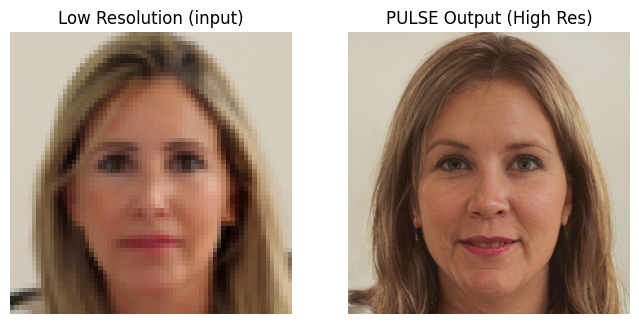

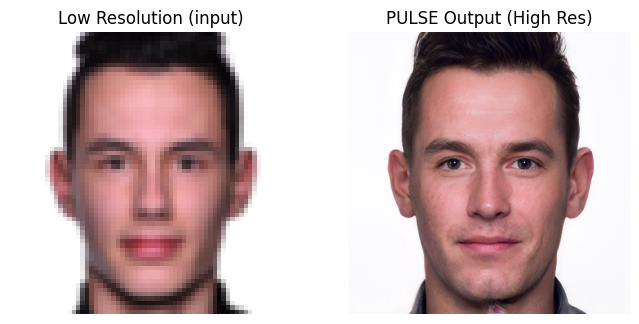

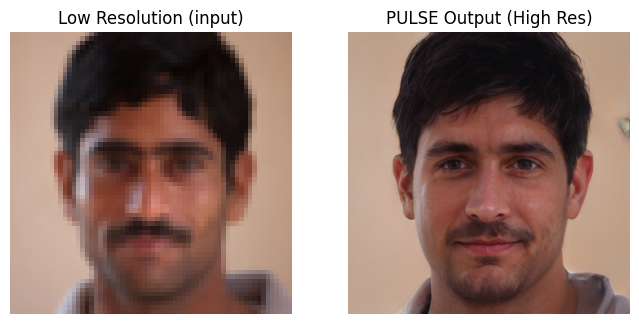

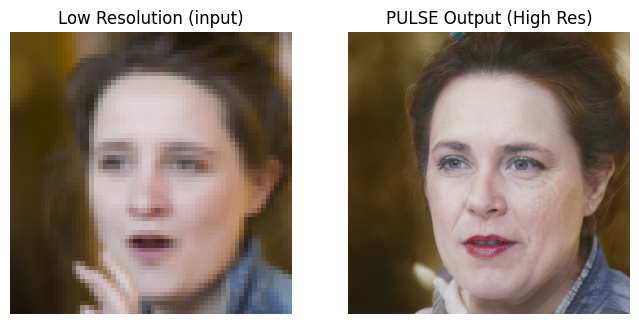

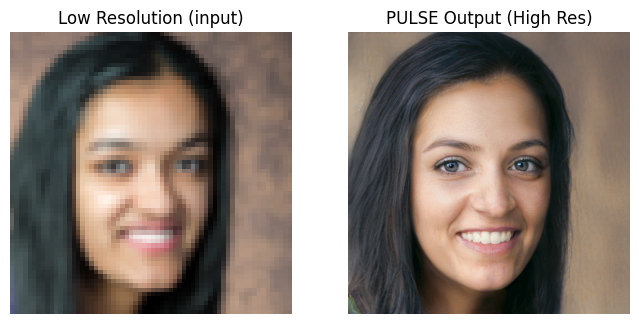

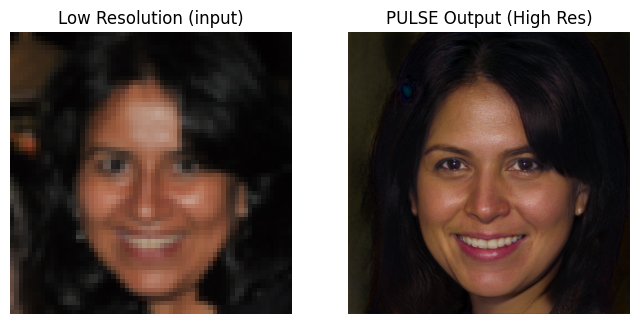

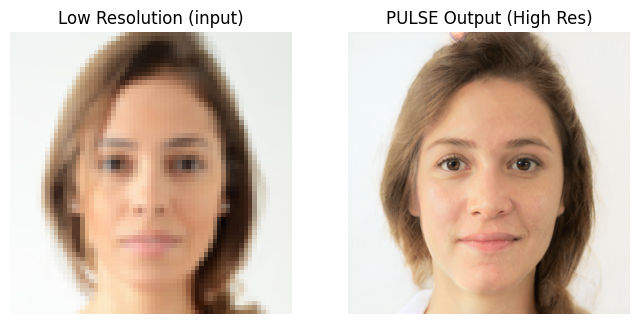

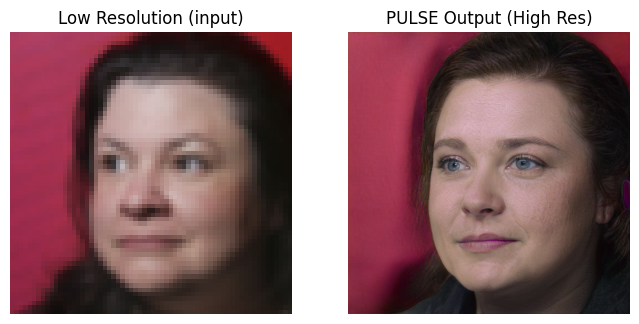

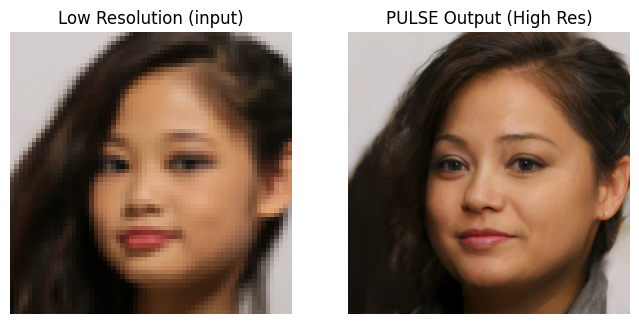

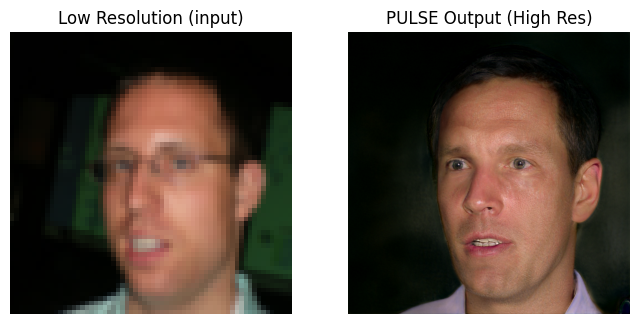

In [15]:
import os
from PIL import Image
import matplotlib.pyplot as plt

LR_DIR = "/content/drive/MyDrive/faceSR/train/LR"
SR_DIR = "/content/pulse/runs"

lr_files = set(os.listdir(LR_DIR))
sr_files = set(os.listdir(SR_DIR))
common_files = sorted(lr_files & sr_files)

print(f"Found {len(common_files)} matching images")

for filename in common_files[:10]:
    lr_img = Image.open(os.path.join(LR_DIR, filename))
    sr_img = Image.open(os.path.join(SR_DIR, filename))

    plt.figure(figsize=(8,4))

    plt.subplot(1,2,1)
    plt.imshow(lr_img)
    plt.title("Low Resolution (input)")
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(sr_img)
    plt.title("PULSE Output (High Res)")
    plt.axis("off")

    plt.show()


In [16]:
!pip install piq -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 100.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 94.2 MB/s eta 0:00:00


In [18]:
!pip install piq lpips


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 2.6 MB/s eta 0:00:00


In [19]:
import os
from pathlib import Path
import numpy as np
from PIL import Image
import torch
import piq
import lpips

hr_dir = Path("/content/drive/MyDrive/faceSR/train/HR")
sr_dir = Path("/content/pulse/runs")

common_files = sorted(set(os.listdir(hr_dir)) & set(os.listdir(sr_dir)))
print(f"Found {len(common_files)} matching files")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
lpips_vgg = lpips.LPIPS(net='vgg').to(device)

def to_tensor_01(img):
    arr = np.array(img).astype(np.float32) / 255.0
    return torch.from_numpy(arr).permute(2,0,1).unsqueeze(0).to(device)

def to_tensor_m11(img):
    return to_tensor_01(img) * 2 - 1

rows = []
psnr_vals, ssim_vals, lpips_vals = [], [], []

for fname in common_files:
    hr = Image.open(hr_dir / fname).convert("RGB")
    sr = Image.open(sr_dir / fname).convert("RGB")

    # חיתוך לאותו גודל
    w = min(hr.width, sr.width)
    h = min(hr.height, sr.height)
    hr = hr.crop(((hr.width - w)//2, (hr.height - h)//2, (hr.width - w)//2 + w, (hr.height - h)//2 + h))
    sr = sr.crop(((sr.width - w)//2, (sr.height - h)//2, (sr.width - w)//2 + w, (sr.height - h)//2 + h))

    t_hr = to_tensor_01(hr)
    t_sr = to_tensor_01(sr)

    psnr_val = piq.psnr(t_sr, t_hr, data_range=1.).item()
    ssim_val = piq.ssim(t_sr, t_hr, data_range=1.).item()
    lpips_val = lpips_vgg(to_tensor_m11(sr), to_tensor_m11(hr)).item()

    psnr_vals.append(psnr_val)
    ssim_vals.append(ssim_val)
    lpips_vals.append(lpips_val)

    rows.append((fname, psnr_val, ssim_val, lpips_val))

print(f"{'File':30} PSNR     SSIM     LPIPS")
for r in rows:
    print(f"{r[0]:30} {r[1]:.4f}  {r[2]:.4f}  {r[3]:.4f}")

print("\nAverages for all matching images:")
print(f"PSNR:  {np.mean(psnr_vals):.4f}")
print(f"SSIM:  {np.mean(ssim_vals):.4f}")
print(f"LPIPS: {np.mean(lpips_vals):.4f}")

Found 74 matching files
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 225MB/s]


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/vgg.pth
File                           PSNR     SSIM     LPIPS
00059.png                      21.9138  0.6135  0.4533
00064.png                      21.9109  0.7755  0.3795
00145.png                      24.0372  0.7148  0.4712
00147.png                      23.5641  0.6914  0.5097
00149.png                      22.6453  0.6025  0.5164
00174.png                      23.5871  0.5728  0.5151
00200.png                      22.7801  0.7312  0.4091
00213.png                      24.1341  0.7177  0.4757
00225.png                      23.6907  0.6843  0.4771
00235.png                      23.8370  0.6403  0.4718
00336.png                      23.3059  0.7579  0.4027
00339.png                      22.8597  0.7131  0.4393
00340.png                      23.2528  0.6458  0.4868
00341.png                      22.6469  0.6177  0.5289
00347.png                      23.2595  0.6508  0.4830
00351.png                      23